# Visualisierung der Daten



# Verwendete Pakete (inklusive Version)

In [1]:
# pandas: Für die Datenanalyse und -manipulation
!pip install pandas==2.2.2

# seaborn: Für die Datenvisualisierung
!pip install seaborn==0.13.2

# branca: Hilfsfunktionen für die Arbeit mit Leaflet-Karten in Folium
!pip install branca==0.8.0

# folium: Für die Erstellung interaktiver Karten
!pip install folium==0.14.0

# matplotlib: Für die Erstellung statischer Visualisierungen
!pip install matplotlib==3.7.1

#geopandas: Für die Arbeit mit Geodaten
!pip install geopandas==1.0.1

#geopy: Für Geokodierungsaufgaen
!pip install geopy==2.3.0

#fiona: Für das Lesen und Schreiben von Vektor-Geodatendateiformaten
!pip install fiona==1.8.21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 81.4 MB/s eta 0:00:00


# Google Drive einbinden

Dieser Codeabschnitt stellt eine Verbindung zu Ihrem Google Drive her und ermöglicht den Zugriff auf Ihre Dateien innerhalb der Colab-Umgebung.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Module importieren

In diesem Abschnitt werden die benötigten Bibliotheken für die Datenverarbeitung, Visualisierung und Kartenerstellung importiert.

In [3]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear
from matplotlib.colors import LinearSegmentedColormap
import branca
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Daten zu Mietkosten, Sonnenscheindauer und Stromkosten in den verschiedenen Kantonen der Schweiz

## Mietkosten je Kanton pro Monat für TEST

Monatlicher Netto-Mietzins (ohne Neben- und Heizkosten) der Mieter- und Genossenschafterwohnungen, in Franken der 4-Zimmer-Wohnungen je Kanton.

In [ ]:
# Monatliche Mietkosten je Kanton (für eine 4-Zimmer-Wohnung)
rent_data = {
    'Kanton': ["Zürich", "Bern", "Luzern", "Uri", "Schwyz", "Obwalden", "Nidwalden", "Glarus", "Zug", "Freiburg",
               "Solothurn", "Basel-Stadt", "Basel-Landschaft", "Schaffhausen", "Appenzell Innerrhoden",
              "Appenzell Ausserrhoden", "St. Gallen", "Graubünden", "Aargau", "Thurgau", "Tessin", "Waadt",
               "Wallis", "Neuenburg", "Genf", "Jura"],
   'Total Miete': [1827, 1420, 1506, 1288, 1756, 1509, 1667, 1318, 2049, 1444, 1373, 1717, 1624, 1346, 1341, 1598,
                    1375, 1454, 1555, 1409, 1428, 1726, 1363, 1198, 1621, 1091]
}

## Sonnenscheinsstunden je Kanton pro Jahr für TEST

Meteoschweiz erfasst täglich den einfallenden Sonnenschein. Sobald die Differenz zwischen diffuser und direkter Sonnenstrahlung einen Wert von 200 W/m2 erreicht, wird dies als Sonnenschein erfasst. Monatsweise werden die Sonnenscheinstunden aufaddiert und als Gesamtwert ausgewiesen.

In [ ]:
# Sonnenscheindauer pro Jahr je Kanton
 sunshine_data = {
    'Kanton': ["Zürich", "Bern", "Luzern", "Uri", "Schwyz", "Obwalden", "Nidwalden", "Glarus", "Zug", "Freiburg",
               "Solothurn", "Basel-Stadt", "Basel-Landschaft", "Schaffhausen", "Appenzell Innerrhoden",
               "Appenzell Ausserrhoden", "St. Gallen", "Graubünden", "Aargau", "Thurgau", "Tessin", "Waadt",
               "Wallis", "Neuenburg", "Genf", "Jura"],
    'Total Sonnenscheindauer': [1511, 2057, 2155, 1864, 1844, 1517, 2113, 1429, 2110, 1885, 2340, 1896, 2087,
                                2064, 2113, 2124, 1889, 1750, 2279, 1990, 1900, 1984, 2074, 1890, 1945, 1890]
}

## Stromkosten (Standard-Produkt, Total exkl. MWST (Rp./kWH)) für TEST

Basis: 4-Zimmer-Wohnung mit Elektroherd (H2), 2'500 kWh/Jahr


In [ ]:
# Daten für die Stromkosten
electricity_data = {
    'Kanton': ["Zürich", "Bern", "Luzern", "Uri", "Schwyz", "Obwalden", "Nidwalden", "Glarus", "Zug", "Freiburg",
               "Solothurn", "Basel-Stadt", "Basel-Landschaft", "Schaffhausen", "Appenzell Innerrhoden",
               "Appenzell Ausserrhoden", "St. Gallen", "Graubünden", "Aargau", "Thurgau", "Tessin", "Waadt",
               "Wallis", "Neuenburg", "Genf", "Jura"],
    'Total Stromkosten': [13.6, 20.5, 27.5, 21.9, 22.7, 26.5, 22.5, 23.3, 23.1, 21.0, 19.9, 23.2, 21.9, 23.6,
                          24.9, 24.3, 21.3, 23.3, 29.0, 24.7, 21.9, 19.7, 21.1, 20.5, 22.4, 25.6]
}

# Shapefile-Datei der Schweizer Kantonsgrenzen

Quelle: https://www.swisstopo.admin.ch/de/landschaftsmodell-swissboundaries3d

In [22]:
# Pfad zur Shapefile-Datei der Schweizer Kantonsgrenzen
shapefile_path = "/content/drive/MyDrive/ie_scripting_datasets/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"

# Laden der Kantonsgrenzen und Konvertierung in das Koordinatensystem WGS84 (Latitude/Longitude)
cantons_gdf = gpd.read_file(shapefile_path)
if cantons_gdf.crs is None or cantons_gdf.crs.to_string() != 'EPSG:2056':
    cantons_gdf.crs = "EPSG:2056"
cantons_gdf = cantons_gdf.to_crs(epsg=4326)

# Umbenennung der Kantonsnamen für das Merging
cantons_gdf['Kanton'] = cantons_gdf['NAME'].replace({
    'ZÃ¼rich': 'Zürich', 'GraubÃ¼nden': 'Graubünden', 'NeuchÃ¢tel': 'Neuenburg', 'GenÃ¨ve': 'Genf',
    'Fribourg': 'Freiburg', 'Ticino': 'Tessin', 'Vaud': 'Waadt', 'Valais': 'Wallis'
})


# Erstellen der DataFrames und Zusammenführen der Daten in einen einzigen DataFrame

In [ ]:
# Erstellen der DataFrames und Zusammenführen der Daten in einen einzigen DataFrame
rent_df = pd.DataFrame(rent_data)
sunshine_df = pd.DataFrame(sunshine_data)
electricity_df = pd.DataFrame(electricity_data)
data_df = rent_df.merge(sunshine_df, on='Kanton').merge(electricity_df, on='Kanton')
merged_gdf = cantons_gdf.merge(data_df, on='Kanton', how='left')

# Einlesen JSON-File

In [25]:
# Pfad zur JSON-Datei
file_path = '/content/drive/MyDrive/ie_scripting_datasets/sunshine_data_strom_mietpreise_2020_df.json'

# Einlesen der JSON-Datei
df = pd.read_json(file_path)

# Filtere nach den gewünschten Spalten: Kanton, Produkt, Total_Sunhours, 4-Zimmer
df_filtered = df[['Kanton', 'Produkt', 'Total exkl. MWST (Rp./kWH)','Total_Sunhours', '4-Zimmer']]

# Filtere nur die Zeilen, in denen das Produkt "Standardprodukt" ist
df_filtered = df_filtered[df_filtered['Produkt'] == 'Standardprodukt']

# Berechne den Durchschnitt für jeden Kanton
df_avg = df_filtered.groupby('Kanton').agg({
    'Total_Sunhours': 'mean',  # Durchschnitt der Total_Sunhours
    '4-Zimmer': 'mean',         # Durchschnitt der 4-Zimmer Spalte
    'Total exkl. MWST (Rp./kWH)': 'mean'# Durchschnitt der Total exkl. MWST (Rp./kWH)
}).reset_index()

# Runden der Spalten
df_avg['Total_Sunhours'] = df_avg['Total_Sunhours'].round(0).astype(int)  # Runden auf ganze Zahl und als Integer speichern
df_avg['4-Zimmer'] = df_avg['4-Zimmer'].round(0).astype(int)  # Runden auf ganze Zahl und als Integer speichern
df_avg['Total exkl. MWST (Rp./kWH)'] = df_avg['Total exkl. MWST (Rp./kWH)'].round(2)  # Runden auf 2 Dezimalstellen und als Integer speichern

# Umbenennen der Spalten
data_df = df_avg.rename(columns={
    'Total_Sunhours': 'Total Sonnenscheindauer',
    '4-Zimmer': 'Total Miete',
    'Total exkl. MWST (Rp./kWH)': 'Total Stromkosten'
})

# Die resultierende Tabelle anzeigen
print(data_df)



              Kanton  Total Sonnenscheindauer  Total Miete  Total Stromkosten
0             Aargau                     1864         1555              21.87
1   Basel-Landschaft                     2037         1624              23.24
2               Bern                     1914         1420              26.57
3           Freiburg                     2087         1444              23.34
4               Genf                     2113         1621              19.87
5             Glarus                     1429         1318              24.33
6         Graubünden                     1875         1454              22.77
7               Jura                     2008         1091              28.96
8             Luzern                     1896         1506              13.60
9          Neuenburg                     2028         1198              24.94
10         Nidwalden                     1907         1667              21.13
11          Obwalden                     1517         1509      

# Hat die Sonnenscheindauer einen Einfluss auf die Miet- oder Stromkosten?

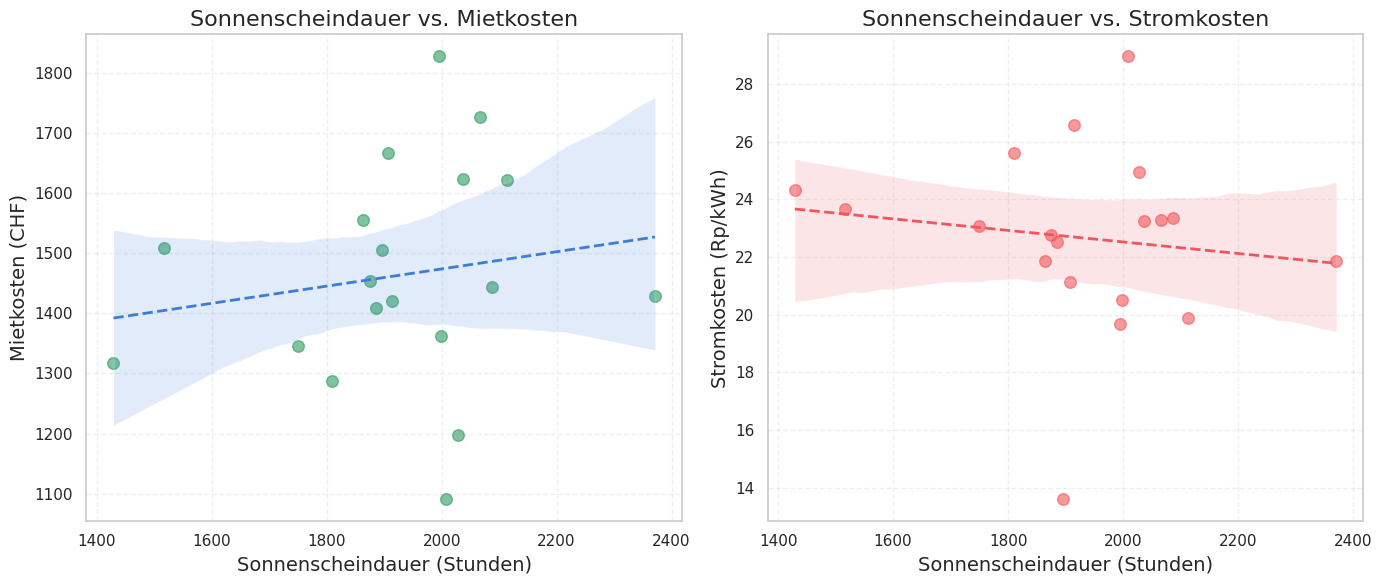

In [20]:
# Stil von Seaborn für eine ansprechendere Darstellung
sns.set(style="whitegrid", palette="muted")

# Erstelle eine größere Figur für die Diagramme
plt.figure(figsize=(14, 6))

# Sonnenscheindauer vs. Mietkosten
plt.subplot(1, 2, 1)
sns.regplot(x='Total Sonnenscheindauer', y='Total Miete', data=data_df,
            scatter_kws={'s': 70, 'alpha': 0.6, 'color': '#2d9b5d'},  # Angepasste Punktgröße und Transparenz
            line_kws={'color': '#3b7dd8', 'linewidth': 2, 'ls': '--'})  # Angepasste Linie (blau, gestrichelt)
plt.title('Sonnenscheindauer vs. Mietkosten', fontsize=16)
plt.xlabel('Sonnenscheindauer (Stunden)', fontsize=14)
plt.ylabel('Mietkosten (CHF)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)  # Weiche Rasterlinien

# Sonnenscheindauer vs. Stromkosten
plt.subplot(1, 2, 2)
sns.regplot(x='Total Sonnenscheindauer', y='Total Stromkosten', data=data_df,
            scatter_kws={'s': 70, 'alpha': 0.6, 'color': '#f0565b'},  # Angepasste Punktgröße und Transparenz
            line_kws={'color': '#f0565b', 'linewidth': 2, 'ls': '--'})  # Rote Linie, gestrichelt
plt.title('Sonnenscheindauer vs. Stromkosten', fontsize=16)
plt.xlabel('Sonnenscheindauer (Stunden)', fontsize=14)
plt.ylabel('Stromkosten (Rp/kWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Optimierung der Darstellung und Speichern der Grafik
plt.tight_layout()
plt.savefig('sonnenscheindauer_vs_miet_stromkosten_besser.png', dpi=300)
plt.show()

In [23]:
merged_gdf = cantons_gdf.merge(data_df, on='Kanton', how='left')

# Anzeigen der Werte in OpenStreetMap

In [24]:
# Erstellen der Karte mit Mittelpunkt Schweiz
m = folium.Map(location=[46.8182, 8.2275], zoom_start=7)

# Calculate min and max values for 'Total Sonnenscheindauer'
min_val = merged_gdf['Total Sonnenscheindauer'].min() # Calculate minimum value of 'Total Sonnenscheindauer'
max_val = merged_gdf['Total Sonnenscheindauer'].max() # Calculate maximum value of 'Total Sonnenscheindauer'

# Erstellen der benutzerdefinierten Farbskala von dunkelgelb bis hellgelb
colors = ["#FF8C00", "#FFD700", "#FFFFE0"]  # Dreifarbige Gelbskala
sunshine_colormap = branca.colormap.LinearColormap(colors=colors, vmin=min_val, vmax=max_val)
sunshine_colormap = sunshine_colormap.to_step(n=20, method='log')
sunshine_colormap.caption = 'Total Sonnenscheindauer'
sunshine_colormap.add_to(m)

# Stilfunktion für Kantonsflächen basierend auf der Sonnenscheindauer
def style_function(feature):
    return {
        'fillColor': sunshine_colormap(feature['properties']['Total Sonnenscheindauer']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Convert Timestamp columns to strings before creating GeoJson
for col in merged_gdf.select_dtypes(include=['datetime64']).columns:
    merged_gdf[col] = merged_gdf[col].astype(str)

# Hinzufügen der Kantonsflächen zur Karte
folium.GeoJson(
    merged_gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Kanton', 'Total Sonnenscheindauer'],
        aliases=['Kanton:', 'Sonnenscheindauer:'],
        localize=True
    )
).add_to(m)

# Farbskalen für Mietkosten und Stromkosten
rent_colormap = linear.YlOrRd_09.scale(merged_gdf['Total Miete'].min(), merged_gdf['Total Miete'].max())
electricity_colormap = linear.YlOrRd_09.scale(merged_gdf['Total Stromkosten'].min(), merged_gdf['Total Stromkosten'].max())

# Hinzufügen der Marker für Mietkosten und Stromkosten (ohne Clusterung)
for idx, row in merged_gdf.iterrows():
    try:
        # Farbe für Mietkosten-Marker (Haus-Icon)
        rent_color = rent_colormap(row['Total Miete'])

        # Erster Marker für Mietkosten (Haus-Icon)
        folium.Marker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            popup=folium.Popup(f"<b>Kanton:</b> {row['Kanton']}<br>"
                               f"<b>Total Miete:</b> {row['Total Miete']}<br>"
                               f"<b>Sonnenscheindauer:</b> {row['Total Sonnenscheindauer']}<br>"
                               f"<b>Stromkosten:</b> {row['Total Stromkosten']}", max_width=300),
            icon=folium.Icon(color='blue', icon="home", prefix="fa", icon_color=rent_color)
        ).add_to(m)

        # Farbe für Stromkosten-Marker (Blitz-Icon)
        electricity_color = electricity_colormap(row['Total Stromkosten'])

        # Zweiter Marker für Stromkosten (Blitz-Icon)
        folium.Marker(
            location=[row.geometry.centroid.y + 0.08, row.geometry.centroid.x],  # leicht versetzt
            popup=folium.Popup(f"<b>Kanton:</b> {row['Kanton']}<br>"
                               f"<b>Stromkosten:</b> {row['Total Stromkosten']}", max_width=300),
            icon=folium.Icon(color='white', icon="bolt", prefix="fa", icon_color=electricity_color)
        ).add_to(m)

    except Exception as e:
        print(f"Fehler bei der Verarbeitung von Kanton {row['Kanton']}: {e}")

# Layer Control hinzufügen, falls zusätzliche Layer verwendet werden sollen
folium.LayerControl().add_to(m)

# Speichern der Karte als HTML-Datei
m.save('interaktive_karte_mit_mietkosten_stromkosten_und_sonnenscheindauer.html')

# Zeigen der Karte (im Notebook oder Webbrowser)
m


Fehler bei der Verarbeitung von Kanton Schwyz: Thresholds are not sorted.
Fehler bei der Verarbeitung von Kanton Solothurn: Thresholds are not sorted.
Fehler bei der Verarbeitung von Kanton Appenzell Ausserrhoden: Thresholds are not sorted.
Fehler bei der Verarbeitung von Kanton Zug: Thresholds are not sorted.
Fehler bei der Verarbeitung von Kanton St. Gallen: Thresholds are not sorted.
Fehler bei der Verarbeitung von Kanton Basel-Stadt: Thresholds are not sorted.
Fehler bei der Verarbeitung von Kanton Appenzell Innerrhoden: Thresholds are not sorted.


TypeError: '<=' not supported between instances of 'NoneType' and 'float'

# Erstellung der Tabelle mit Attraktivitäts-Score

### Festlegung des Darstellungsstils der Tabellen

In [ ]:
# Stil der Tabelle
def style_table(df, col, norm_col, sort_by):
    # Tabelle nach der Attraktivitäts-Score-Spalte sortieren
    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

    return (df_sorted.style
            .format({col: "{:,.0f}" if col != 'Total Stromkosten' else "{:.2f}",
                     norm_col: "{:.2f}"})
            .set_caption(f"Tabelle für '{col}' und normalisierte Werte (sortiert nach '{sort_by}')")
            .set_table_styles([
                {'selector': 'caption', 'props': 'font-size: 16px; font-weight: bold; text-align: center;'},
                {'selector': 'th', 'props': 'background-color: #f7f7f7; color: #333; font-weight: bold; text-align: center;'},
                {'selector': 'td', 'props': 'text-align: center; padding: 8px; border: 1px solid #ccc;'}
            ])
            .hide(axis='index')
            .background_gradient(subset=[norm_col], cmap='coolwarm')
            )



### Normalisierung der Werte sowie Darstellung der Zwischentabellen zur Überprüfung

In [ ]:
# Normalisierung und Anzeige der Zwischentabellen
normalized_tables = {}
for col in ['Total Miete', 'Total Sonnenscheindauer', 'Total Stromkosten']:
    if col == 'Total Miete' or col == 'Total Stromkosten':
        # Niedrigere Werte sind besser, daher Invertierung
        data_df[col + '_Score'] = 1 - (data_df[col] - data_df[col].min()) / (data_df[col].max() - data_df[col].min())
    else:
        # Höhere Werte sind besser
        data_df[col + '_Score'] = (data_df[col] - data_df[col].min()) / (data_df[col].max() - data_df[col].min())

    # Speichern der Zwischentabelle
    normalized_tables[col] = data_df[['Kanton', col, col + '_Score']].copy()

    # Tabellen anzeigen, sortiert nach dem normalisierten Wert
    display(style_table(normalized_tables[col], col, col + '_Score', sort_by=col + '_Score'))


Kanton,Total Miete,Total Miete_Score
Jura,"1,091",1.00
Neuenburg,"1,198",0.89
Uri,"1,288",0.79
Glarus,"1,318",0.76
Appenzell Innerrhoden,"1,341",0.74
Schaffhausen,"1,346",0.73
Wallis,"1,363",0.72
Solothurn,"1,373",0.71
St. Gallen,"1,375",0.70
Thurgau,"1,409",0.67


Kanton,Total Sonnenscheindauer,Total Sonnenscheindauer_Score
Solothurn,"2,340",1.00
Aargau,"2,279",0.93
Luzern,"2,155",0.80
Appenzell Ausserrhoden,"2,124",0.76
Appenzell Innerrhoden,"2,113",0.75
Nidwalden,"2,113",0.75
Zug,"2,110",0.75
Basel-Landschaft,"2,087",0.72
Wallis,"2,074",0.71
Schaffhausen,"2,064",0.70


Kanton,Total Stromkosten,Total Stromkosten_Score
Zürich,13.60,1.00
Waadt,19.70,0.60
Solothurn,19.90,0.59
Neuenburg,20.50,0.55
Bern,20.50,0.55
Freiburg,21.00,0.52
Wallis,21.10,0.51
St. Gallen,21.30,0.50
Tessin,21.90,0.46
Basel-Landschaft,21.90,0.46


### Attraktivitäts-Score unter Berücksichtigung aller Werte berechnen

In [ ]:
# Attraktivitätsscore berechnen (alle Indikatoren gleich gewichtet)
data_df['Attraktivitäts-Score'] = data_df[['Total Miete_Score', 'Total Sonnenscheindauer_Score', 'Total Stromkosten_Score']].mean(axis=1)

# Sortieren der Kantone nach Attraktivität
df_sorted = data_df.sort_values(by='Attraktivitäts-Score', ascending=False)



### Vollständige Tabelle mit Attraktivitäts-Score
(Mittelwert der Attraktivitäts-Scores der Miete, Sonnenscheindauer und Stromkosten)

In [ ]:
# Benutzerdefinierte Formatierungsfunktionen
def format_thousands(value, suffix):
    if pd.isna(value):
        return ""
    return f"{value:,.0f}".replace(",", "'") + f" {suffix}"

# Tabelle mit den relevanten Spalten
table = df_sorted[['Kanton', 'Total Miete', 'Total Sonnenscheindauer', 'Total Stromkosten', 'Attraktivitäts-Score']]

# Spaltennamen für die Darstellung ändern
table = table.rename(columns={
    'Total Miete': 'Miete pro Monat',  # Anzeige der Spalte ändern
    'Total Sonnenscheindauer': 'Sonnenscheindauer pro Jahr',  # Anzeige der Spalte ändern
    'Total Stromkosten': 'Stromkosten'  # Anzeige der Spalte ändern
})

# Tabelle erstellen und formatieren
def style_table(df):
    return (df.style
            .format({
                'Miete pro Monat': lambda x: format_thousands(x, "CHF"),  # Miete pro Monat
                'Sonnenscheindauer pro Jahr': lambda x: format_thousands(x, "Stunden"),  # Sonnenscheindauer pro Jahr
                'Stromkosten': "{:.2f} Rp/kWh",  # Stromkosten
                'Attraktivitäts-Score': "{:.2f}"
            })
            .set_caption("Attraktivität der Schweizer Kantone")
            .set_table_styles([
                {'selector': 'caption', 'props': 'font-size: 16px; font-weight: bold; text-align: center;'},
                {'selector': 'th', 'props': 'background-color: #f7f7f7; color: #333; font-weight: bold; text-align: center;'},
                {'selector': 'td', 'props': 'text-align: center; padding: 8px; border: 1px solid #ccc;'}
            ])
            .hide(axis='index')
            .background_gradient(subset=['Attraktivitäts-Score'], cmap='coolwarm')
            )

# Tabelle anzeigen
styled_table = style_table(table)
styled_table


Kanton,Miete pro Monat,Sonnenscheindauer pro Jahr,Stromkosten,Attraktivitäts-Score
Solothurn,1'373 CHF,2'340 Stunden,19.90 Rp/kWh,0.77
Neuenburg,1'198 CHF,1'890 Stunden,20.50 Rp/kWh,0.65
Wallis,1'363 CHF,2'074 Stunden,21.10 Rp/kWh,0.65
Bern,1'420 CHF,2'057 Stunden,20.50 Rp/kWh,0.63
Schaffhausen,1'346 CHF,2'064 Stunden,23.60 Rp/kWh,0.59
Appenzell Innerrhoden,1'341 CHF,2'113 Stunden,24.90 Rp/kWh,0.59
Uri,1'288 CHF,1'864 Stunden,21.90 Rp/kWh,0.58
Jura,1'091 CHF,1'890 Stunden,25.60 Rp/kWh,0.58
St. Gallen,1'375 CHF,1'889 Stunden,21.30 Rp/kWh,0.57
Freiburg,1'444 CHF,1'885 Stunden,21.00 Rp/kWh,0.55
